# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109B Advanced Data Science
## Lab 11: Generative Adversarial Networks

**Harvard University**<br>
**Spring 2019**<br>
**Lab instructor:** Srivatsan Srinivasan<br>
**Instructors:** Pavlos Protopapas and Mark Glickman<br>
**Authors:** Srivatsan Srinivasan, Pavlos Protopapas

In [1]:
import numpy
# from keras.datasets import imdb
# from keras.models import Sequential, Model
# from keras.layers.core import Dense, Dropout
# from keras.layers import LSTM, SimpleRNN, Input
# from keras.layers.embeddings import Embedding
# from keras.layers import Flatten
# from keras.preprocessing import sequence
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers.embeddings import Embedding
import numpy as np
import matplotlib.pyplot as plt
import scipy
# fix random seed for reproducibility
numpy.random.seed(1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
np.random.seed(1)
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Learning Goals

In this lab we will look at Generative Adversarial Networks (GANs), their construction and training.

By the end of this lab, you should:

- know how to put together the building blocks used in GANs 
- have a good undertanding of generative models and implicit distributions that generators learn
- learning properties of GAN at a small scale
- concepts of adversarial training - min-max etc.
- mode collapse problems in GAN

### EXERCISE 1 : Generate 1-D Gaussian Distribution from Uniform Noise

In this exercise, we are going to generate 1-D Gaussian distribution from a n-D uniform distribution. This is a toy exercise in order to understand the ability of GANs (generators) to generate arbitrary distributions from random noise.

Generate training data - Gaussian Distribution

In [3]:
def generate_data(n_samples = 10000,n_dim=1):
  return np.random.randn(n_samples, n_dim)  

Let us define a function that gives you a keras model of general feedforward network 
based on the parameters.

In [ ]:
#INPUT is of input dim,, goes through n_layers number of hidden layers and output is of output_dim
def set_model(input_dim, output_dim, hidden_dim=64,n_layers = 1,activation='tanh',
              optimizer='adam', loss = 'binary_crossentropy'):
    #### YOUR CODE HERE ####
    

In [75]:
class FeedForwardNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=64, n_layers=1):
        super(Model, self).__init__()
        self.input_dim = imput_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [ ]:
#INPUT (z) is of random_dim dimension 
#OUTPUT should be a keras model - D(G(z)) - 
# Discriminator score for the generator's images generated
#from synthetic data.

def get_gan_network(discriminator, random_dim, generator, optimizer = 'adam'):
    ### YOUR CODE HERE ###
    

In [67]:
class Generator(nn.Module):
    def __init__(self, random_dim,output_dim, hidden_dim = 64 ):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(random_dim, hidden_dim, bias=True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim, bias=True)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x        
        
class Discriminator(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,output_dim, bias=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x        

def get_gan_network(discriminator, random_dim, generator):
    return discriminator(generator(random_dim))

Let us now write the training function for a GAN

In [68]:
NOISE_DIM = 10
DATA_DIM = 1
G_LAYERS = 1
D_LAYERS = 1

In [69]:
generator = Generator(NOISE_DIM,DATA_DIM,64)
discriminator = Discriminator(DATA_DIM, 1, 64)

In [70]:
criterion_g = nn.MSELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.001, betas=[0.5,0])

In [71]:
def train_gan(generator, discriminator, epochs=1,batch_size=128):
  x_train = generate_data(n_samples=12800,n_dim=DATA_DIM)
  batch_count = x_train.shape[0]/batch_size
  
#   generator = set_model(NOISE_DIM, # input
#                         DATA_DIM,  # output
#                         n_layers=G_LAYERS, 
#                         activation='tanh',loss = 'mean_squared_error')
#   discriminator = set_model(DATA_DIM, # input
#                             1, # output
#                             n_layers= D_LAYERS, activation='sigmoid')


    gan = get_gan_network(discriminator, NOISE_DIM, generator)
  
  for e in range(1,epochs+1):   
    
    # Noise is generated from a uniform distribution
    noise = np.random.rand(batch_size,NOISE_DIM)
    true_batch = x_train[np.random.choice(x_train.shape[0], batch_size, replace=False), :]
    
    generated_values = generator.predict(noise)
    X = np.concatenate([generated_values,true_batch])
    
    y_dis = np.zeros(2*batch_size)
    
    #One-sided label smoothing to avoid overconfidence. In GAN, if the discriminator depends on a small set of features to detect real images, 
    #the generator may just produce these features only to exploit the discriminator. 
    #The optimization may turn too greedy and produces no long term benefit.
    #To avoid the problem, we penalize the discriminator when the prediction for any real images go beyond 0.9 (D(real image)>0.9). 
    y_dis[:batch_size] = 0.9    
    
    discriminator.trainable = True  
    ###YOUR CODE HERE####
    # One line : Train discriminator using train_on_batch  
    discriminator.trainable = False

    # Train generator. Noise is generated from a uniform distribution
    ### YOUR CODE HERE. Couple of lines. Should call gan.train_on_batch()###
 
 
    
  return generator, discriminator
  

SyntaxError: non-default argument follows default argument (2092871023.py, line 1)

In [ ]:
generator, discriminator = train_gan()

Let us visualize what the generator has learned.

In [ ]:
noise = np.random.rand(10000,NOISE_DIM)
generated_values = generator.predict(noise)
plt.hist(generated_values,bins=100)


true_gaussian = [np.random.randn() for x in range(10000)]

print('1st order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 1) , ', GAN :', scipy.stats.moment(generated_values,1))
print('2nd order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 2) , ', GAN :', scipy.stats.moment(generated_values,2))
print('3rd order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 3) , ', GAN :', scipy.stats.moment(generated_values,3))
print('4th order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 4) , ', GAN :', scipy.stats.moment(generated_values,4))
plt.show()

#### CONCLUSIONS

1. GANs are able to learn a generative model from arbitrary noise distributions.

2. Traditional GANs do not learn the higher-order moments well. Possible issues : Number of samples, approximating higher moments is hard. Usually known to under-predict higher order variances. For people interested in learning why, read more about divergence measures between distributions (particularly about Wasserstein etc.)

#### PLAY WITH IT WHEN YOU HAVE TIME !

1. Try different noise dimensions and see what minimum dimension you need to learn this well.
2. Try to generate multimodal distribution like a Gaussian Mixture instead of simple Gaussian and see if GAN is able to learn multimodal distributions well.

### EXERCISE 2 : MNIST GAN - Learn to generate MNIST digits

In [4]:
# from keras.datasets import mnist
# from keras.utils import np_utils
# from keras.models import Sequential, Model
# from keras.layers import Input, Dense, Dropout, Activation, Flatten
# from keras.layers.advanced_activations import LeakyReLU
# from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook

# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Rescale data since we are using ReLU activations. <b>WHY ?</b>

In [77]:
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train = X_train.astype('float32')/255
# X_test = X_test.astype('float32')/255

In [5]:
z_dim = 100

In [6]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

%matplotlib inline

mnist_dataset = datasets.MNIST('dataset', train=True, download=True, 
               transform=transforms.Compose([
                   transforms.ToTensor()
]))
mnist_dataset_test  = datasets.MNIST('dataset', train=False, download=True, 
               transform=transforms.Compose([
                   transforms.ToTensor()
]))
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
train_loader = torch.utils.data.DataLoader(mnist_dataset,batch_size=128)
test_loader = torch.utils.data.DataLoader(mnist_dataset_test,batch_size=128)

In [8]:
images, labels = next(iter(train_loader))
images.size(),images[0].size()

(torch.Size([128, 1, 28, 28]), torch.Size([1, 28, 28]))

In [9]:
def reduce_batch(images):
    # image.shape = [128,1,28,28]
    return images.squeeze().flatten(1,2)/255 # [128, 784]

#### BUILD MODEL

We are using LeakyReLU activations. 

We will build

a.) Generator
b.) Discriminator
c.) GAN

as feedforwards with multiple layers, dropout and LeakyReLU.

In [86]:
#@title
# adam = Adam(lr=0.0002, beta_1=0.5)

#GENERATOR
# g = Sequential()
#Build your generator - noise_dim -> 256 -> 512 ->1024 ->784. LeakyRelU(0.2), adam
###YOUR CODE HERE###
class Generator(nn.Module):
    def __init__(self, latent_dims, momentum=0.8):
        super(Generator, self).__init__()
        self.latent_dims = latent_dims
        
        self.fc1 = nn.Linear(latent_dims, 128)
        self.fc1_bn = nn.BatchNorm1d(128, momentum=momentum)
        
        self.fc2 = nn.Linear(128, 256)
        self.fc2_bn = nn.BatchNorm1d(256, momentum=momentum)
        
        self.fc3 = nn.Linear(256, 512)
        self.fc3_bn = nn.BatchNorm1d(512, momentum=momentum)
        
        self.fc4 = nn.Linear(512, 1024)
        self.fc4_bn = nn.BatchNorm1d(1024, momentum=momentum)
        
        self.fc5 = nn.Linear(1024, 784)


    def forward(self, z):
        z = self.fc1_bn(F.leaky_relu(self.fc1(z), negative_slope=0.2))
        z = self.fc2_bn(F.leaky_relu(self.fc2(z), negative_slope=0.2))
        z = self.fc3_bn(F.leaky_relu(self.fc3(z), negative_slope=0.2))
        z = self.fc4_bn(F.leaky_relu(self.fc4(z), negative_slope=0.2))
        z = self.fc5(z)
        print('G(z).size() :',z.size())
        return z     

#DISCRIMINATOR
#Build your discriminator - 784 -> 1024 -> 512 -> 256 -> 1. LeakyRelu(0.2), adam
# d = Sequential()
###YOUR CODE HERE###
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        x = self.fc3(x)
        return torch.sigmoid(x)

In [87]:
#GAN
# d.trainable = False
# inputs = Input(shape=(z_dim, ))
# hidden = g(inputs)

generator = Generator(z_dim)
discriminator = Discriminator()
criterion = nn.BCELoss()
discriminator_optim = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5,0.999))
generator_optim = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5,0.999))

In [88]:
print("GENERATOR : ", generator)
print("DISCRIMINATOR : ", discriminator)

GENERATOR :  Generator(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc2_bn): BatchNorm1d(256, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=512, bias=True)
  (fc3_bn): BatchNorm1d(512, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=512, out_features=1024, bias=True)
  (fc4_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=1024, out_features=784, bias=True)
)
DISCRIMINATOR :  Discriminator(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [89]:
# hidden = generator_()

# class GAN_(nn.Module):
#     def __init__(self, generator, discriminator):
#         super(GAN_, self).__init__()
#         self.g = generator
#         self.d = discriminator
    
#     def forward(self, x):
#         out = self.g(x)
#         out = self.d(out)
#         return out
        
# gan = GAN_(generator_, discriminator_)
# criterion_gan = nn.BCELoss()
# optimizer_gan = optim.Adam(gan.parameters(),lr=0.0002, betas=(0.5,0.999))

# output = d(hidden)
# gan = Model(inputs, output)
# gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Let us write some visualization code.

In [90]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

<b> TRAIN THE MODEL </b>

Generate noise, feed into generator, compare them with discriminator, train the GAN and REPEAT.

In [91]:
losses = {"D":[], "G":[]}

def train(generator, discriminator, gen_optimizer, dis_optimizer,
          criterion, train_loader, epochs=1, plt_frq=1, BATCH_SIZE=128):
#     batchCount = int(X_train.shape[0] / BATCH_SIZE)
    batchCount = int(len(train_loader.dataset) / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batchCount)
    
#     testing_random_latent = torch.randn(5, z_dim)
    
#     for e in range(1, epochs+1):
#         if e == 1 or e%plt_frq == 0:
#             print('-'*15, 'Epoch %d' % e, '-'*15)
#         for batch_index, (batch_images, _) in enumerate(train_loader):
            
# #             batch_images.size() == (128,1,28,28)
#             batch_images = batch_images.view(BATCH_SIZE, -1) # (128, 784)
# #             print(batch_x.size(0))
#             reals = torch.ones(BATCH_SIZE,1)
#             fakes = torch.zeros(BATCH_SIZE,1)
            
#             # discriminator  ### >> D(x) 부분
#             dis_results = discriminator(batch_images) # train real images
#             # dis_results.size() = (BATCH_SIZE,1,1)
#             dis_real_loss = criterion(dis_results, reals) # discriminator에게 real distribution을 학습
# #             dis_results = dis_results.view(-1,1)  # ((BATCH_SIZE,1))
            
                        
#             # Generator  ### >> D(G(z)) 부분
#             latent = torch.randn(BATCH_SIZE, z_dim) # random variable z
#             fake_images = generator(latent).detach() # generate fake image = G(z)
# #             print('fake_image:',fake_images.size())
#             dis_results = discriminator(fake_images) # D(G(z)) 부분
            
# #             print(dis_results)
# #             print('fakes:',fakes)
        
#             dis_fake_loss = criterion(dis_results, fakes) # D로 하여금 G가 가짜임을 학습시킴
            
#             # total loss = E[log(D(x))] + E[log(1-(D(G(z))))]
#             dis_total_loss = dis_real_loss + dis_fake_loss
            
#             # 역전파 >> D 모델 가중치 갱신
#             discriminator.zero_grad() 
#             dis_total_loss.backward() 
#             dis_optimizer.step()
            
#             # G로 하여금 다시 D를 속일 수 있게 만들어야 함
#             latent = torch.randn(BATCH_SIZE, z_dim)
#             fake_images = generator(latent)
#             dis_results = discriminator(fake_images) 
            
#             # D 스텝이 끝난 후 G 수정
#             gen_loss = criterion(dis_results,reals) # E[log(1-(D(G(z))))]
            
#             # 역전파, 최적화
#             discriminator.zero_grad()
#             generator.zero_grad()
#             gen_loss.backward()
#             gen_optimizer.step()
            
            
#     if epoch % 20 == 0:
# #             print("EPOCH {}: BATCH: {}, discrim_loss: {}, generator_loss: {}".format(epoch, batch_index, dis_total_loss, gen_loss))
#         with torch.no_grad():
#             testing_fake_images = generator(testing_random_latent)
#             testing_fake_images = testing_fake_images.reshape(5, 28, 28).numpy()

#             plt.figure(figsize=(10, 5))
#             plt.title("GENERATED IMAGE, EPOCH {}".format(epoch))
#             for i in range(5):
#                 plt.subplot('15{}'.format(i+1))
#                 plt.imshow(testing_fake_images[i], cmap='gray')
#             plt.show()

#     return discriminator, generator
            
    batch_size = BATCH_SIZE
    testing_random_latent = torch.randn(5, z_dim)
    
    for epoch in range(epochs):
        for batch_index, (batch_images, _) in enumerate(train_loader):
            # Label 생성
            reals = torch.ones(batch_size, 1)
            fakes = torch.zeros(batch_size, 1)

            batch_images = batch_images.view(batch_size, -1)
            
            #### DISCRIMINATOR
            # Real Image 에 대한 loss
            dis_results = discriminator(batch_images)
            dis_real_loss = criterion(dis_results, reals)
            
            # Fake Image 에 대한 loss
            latent = torch.randn(batch_size, z_dim)
            fake_images = generator(latent).detach()
            dis_results = discriminator(fake_images)
            dis_fake_loss = criterion(dis_results, fakes)
            
            # total loss
            dis_total_loss = dis_real_loss + dis_fake_loss

            discriminator.zero_grad()
            dis_total_loss.backward()
            dis_optimizer.step()
            

            #### GENERATOR
            latent = torch.randn(batch_size, z_dim)
            fake_images = generator(latent) 
            dis_results = discriminator(fake_images)
            
            # Fake Image 에 대한 generator loss
            # 여기가 매우 중요, 우리가 generator 를 train 할 때는, log(1-D(G(z)))를 최소화 하기로 하였다.
            # 하지만, -log(D(G(z)))를 최소화 한다면, 원 식의 방향과 같은 방향으로 최적화가 된다.
            # 이는 log(1-x) 식이 그 기울기가 매우 작기 때문에, 매우 오래 걸리는 것을 보완하기 위함이다.
            # 그리고 -log(D(G(z)))의 최소화는 log(D(G(z)))의 최대화와 같다.
            gen_loss = criterion(dis_results, reals)
            
            discriminator.zero_grad()
            generator.zero_grad()
            gen_loss.backward()
            gen_optimizer.step()
            

        if epoch % 20 == 0:
            print("EPOCH {}: BATCH: {}, discrim_loss: {}, generator_loss: {}".format(epoch, batch_index, dis_total_loss, gen_loss))
            with torch.no_grad():
                testing_fake_images = generator(testing_random_latent)
                testing_fake_images = testing_fake_images.reshape(5, 28, 28).numpy()
                
                plt.figure(figsize=(10, 5))
                plt.title("GENERATED IMAGE, EPOCH {}".format(epoch))
                for i in range(5):
                   plt.subplot('15{}'.format(i+1))
                   plt.imshow(testing_fake_images[i], cmap='gray')
                plt.show()
            
    return discriminator, generator

        

In [92]:
train(generator, discriminator, discriminator_optim, generator_optim, 
      criterion, train_loader, epochs=200, plt_frq=40, BATCH_SIZE=128)

Epochs: 200
Batch size: 128
Batches per epoch: 468
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size

G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G

G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G

G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G

G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G(z).size() : torch.Size([128, 784])
G

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x588 and 784x256)

#### TAKE-HOME EXERCISE

1. Try to build CNN models instead of feedforwards
2. Try different noise dimensions
3. Try implementing some training tricks suggested in https://github.com/soumith/ganhacks and study incremental improvements.

#### DISCUSSION : Why can GANs potentially mode collapse ? Remember there is no guarantee of mode collapse.



#### TL;DR - There is inherently no "motivation" for generator to produce a diverse set of samples as discriminator only penalizes for producing "bad" samples. It is easy to learn a few modes than all modes of a multi modal distribution.

Remember, the goal of the generator G is to fool the discriminator by causing it to assign the generated sample the highest probability of being real as possible. Mathematically, G tries to minimize E_z∼p_z(z)[log(1−D(G(z)))], or in other words, to generate the point x*=G(z) such that x*=argmax_x D(x) (of course, we’re assuming that we hold the discriminator fixed for now; we’re merely describing the optimization objective at a given timestep). Note that this x* is fixed regardless of the value of z, the input to the generator! x* only depends on the discriminator at the given timestep. This means that on expectation, there exists a single fixed point that the generator thinks is the most optimal point to generate regardless of whatever input noise we feed it - there is nothing in the objective function that explicitly forces the generator to generate different samples given the input. During this training step, stochastic gradient descent - again, on expectation - would cause the generator to update its weights towards generating this ideal point.

This by itself doesn’t immediately mean mode collapse; during the entirety of the training process, mode collapse may happen only partially or not at all. Since training is a stochastic process, during the beginning stages in training the generated samples will vary depending on z and the samples drawn from the real distribution will also vary - this means that gradients backpropagated to the generator will vary between training steps depending on the generated and real samples. Moreover the discriminator, ideally, should be able to identify generator mode collapse while it’s happening and assign the collapse point a low probability to force the generator to spread out. This is why we do see training runs succeed in GAN/DCGAN-based models.

But in practice, especially in default GAN models, mode collapse happens quite often. The discriminator ends up not really forcing more diversity in the generator, so much as simply pushing the partially collapsed generator to a different part of output space - if it assigns the collapse point a low probability, the generator will simply move its collapsed distribution to focus on a new output point. And finally, in the case where the generator has actually collapsed to a single point, it can’t get out; you’ll have to restart your training. To see why this is the case, remember how I said above that the gradient updates to the generator are stochastic, because its generated outputs will vary based on z. Well, in the world where the generator is already collapsed, it will emit the same output for every z. This means that if you feed a batch of generator outputs to the discriminator and get the gradients back, the generator gradients will all essentially be identical. And they’ll all be racing towards the same maximum point x*! Which means the generator will continue to generate the same output regardless of input. Even if the discriminator identifies this and sets the point to low probability, still, the identical gradient updates will cause all outputs of the generator rushing to another fixed point. At this point your training is ruined.


Thanks : This version of the answer is from https://www.quora.com/What-causes-mode-collapse-in-GANs

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

from generator import Generator
from discriminator import Discriminator
from train import train_model

import matplotlib.pyplot as plt

# device setting for gpu users
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: ", device)
torch.backends.cudnn.enabled = False

device:  cuda:0


In [31]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

%matplotlib inline

mnist_dataset = datasets.MNIST('dataset', train=True, download=True, 
               transform=transforms.Compose([
                   transforms.ToTensor()
]))
mnist_dataset_test  = datasets.MNIST('dataset', train=False, download=True, 
               transform=transforms.Compose([
                   transforms.ToTensor()
]))
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [64]:
mnist_dataset 

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [84]:
epochs = 300
batch_size = 128
z_dim = 100

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(
                                   mean=(0.5,),
                                   std=(0.5,))])

mnist_dataset = datasets.MNIST(root='./data/', train=True, transform=transform, download=True)



dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [85]:
class Generator(nn.Module):
    def __init__(self, latent_dims, momentum=0.8):
        super(Generator, self).__init__()
        self.latent_dims = latent_dims
        self.fc1 = nn.Linear(latent_dims,128)
        self.fc1_bn = nn.BatchNorm1d(128,momentum=momentum)
        
        self.fc2 = nn.Linear(128,256)
        self.fc2_bn = nn.BatchNorm1d(256,momentum=momentum)
        
        self.fc3 = nn.Linear(256,512)
        self.fc3_bn = nn.BatchNorm1d(512,momentum=momentum)
        
        self.fc4 = nn.Linear(512,1024)
        self.fc4_bn = nn.BatchNorm1d(1024,momentum=momentum)
        
        self.fc5 = nn.Linear(1024,784)
        
    def forward(self, z):
        out = self.fc1_bn(F.leaky_relu(self.fc1(z),negative_slope=0.2))
        out = self.fc2_bn(F.leaky_relu(self.fc2(out),negative_slope=0.2))
        out = self.fc3_bn(F.leaky_relu(self.fc3(out),negative_slope=0.2))
        out = self.fc4_bn(F.leaky_relu(self.fc4(out),negative_slope=0.2))
        out = self.fc5(out)
        return out
    

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,1)
        
    def forward(self,x):
        out = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        out = F.leaky_relu(self.fc2(out), negative_slope=0.2)
        out = self.fc3(out)
        return torch.sigmoid(out)        

In [86]:
def train_model(latent_dims, discriminator, generator, batch_size,k_steps,
               optim_d, optim_g, criterion, dataloader, epochs, device=None):
    testing_random_latent = torch.randn(5,latent_dims)
    # (5,latent_dims) size의 랜덤 변수 생성
   
    for epoch in range(epochs):
        for batch_index, (batch_images, _) in enumerate(dataloader):
            # Label
            reals = torch.ones(batch_size,1) # 진짜 이미지는 1로 
            fakes = torch.zeros(batch_size,1) # 가짜 이미지는 0으로 라벨링
            batch_images = batch_images
            batch_images = batch_images.view(batch_size,-1)
            # 이미지의 size를 (batch_size,784)로 맞춤
    
            # update the discriminator for k steps
            for _ in range(k_steps):
                ### Discriminator
                dis_results = discriminator(batch_images) # D(x)
                dis_real_loss = criterion(dis_results,reals)

                ### Generator
                latent = torch.randn(batch_size, latent_dims)
                fake_images = generator(latent).detach()
                # fake_images.size() = (batch_size, 784)
                dis_results = discriminator(fake_images)
                # dis_results.size() = (batch_size,1)
                dis_fake_loss = criterion(dis_results,fakes) # D(G(z))

                # total loss
                total_loss = dis_real_loss + dis_fake_loss

                # update the discriminator
                discriminator.zero_grad()
                total_loss.backward()
                optim_d.step()
            
            latent = torch.randn(batch_size, latent_dims)
            fake_images = generator(latent)
            dis_results = discriminator(fake_images)
            
            gen_loss = criterion(dis_results,fakes) # D(G(z))
            
            # update the generator
            discriminator.zero_grad()
            generator.zero_grad()
            gen_loss.backward()
            optim_g.step()
            
        # print
        if epoch % 20 == 0:
            print("EPOCH {}: BATCH: {}, discrim_loss: {}, generator_loss: {}".format(epoch,
                 batch_index, total_loss, gen_loss))
            with torch.no_grad():
                testing_fake_images = generator(testing_random_latent)
                testing_fake_images = testing_fake_images.reshape(5,28,28).numpy()
                
                plt.figure(figsize=(10,5))
                plt.title("image by GENERATOR, epoch: {}".format(epoch))
                for i in range(5):
#                     plt.subplot('15{}'.format(i+1))
                    plt.imshow(testing_fake_images[i],cmap='gray')
                plt.show()
                
    return discriminator, generator

In [87]:
generator = Generator(latent_dims=z_dim)
discriminator = Discriminator()

In [88]:
criterion = nn.BCELoss()
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

EPOCH 0: BATCH: 467, discrim_loss: 7.211332558654249e-05, generator_loss: 1.6337144188582897e-05


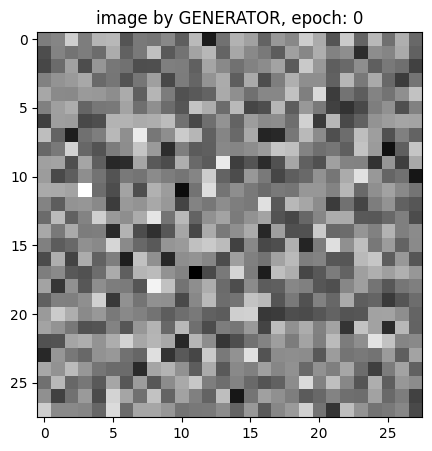

EPOCH 20: BATCH: 467, discrim_loss: 2.877821714264428e-07, generator_loss: 2.03911781682109e-07


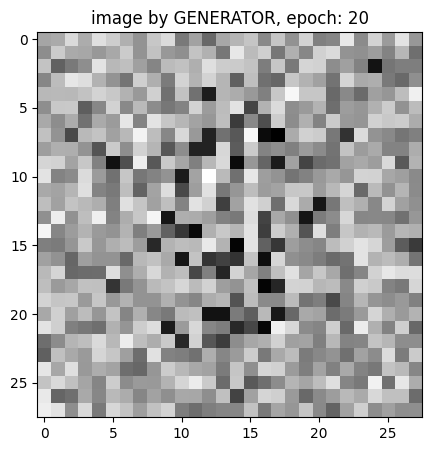

EPOCH 40: BATCH: 467, discrim_loss: 1.1990237969161655e-10, generator_loss: 2.6927975474433374e-11


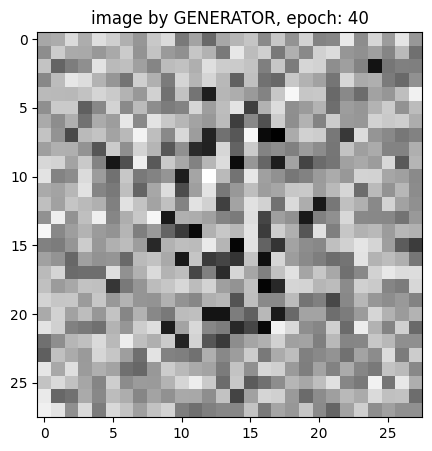

EPOCH 60: BATCH: 467, discrim_loss: 6.742573947088326e-12, generator_loss: 3.924584181941304e-12


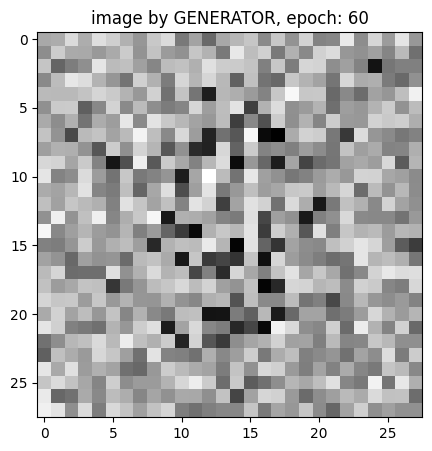

EPOCH 80: BATCH: 467, discrim_loss: 1.1908957977743717e-12, generator_loss: 7.335950965615956e-13


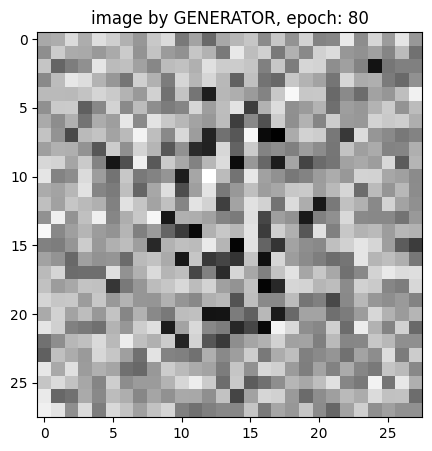

EPOCH 100: BATCH: 467, discrim_loss: 7.787636637987538e-13, generator_loss: 1.0334286594873565e-12


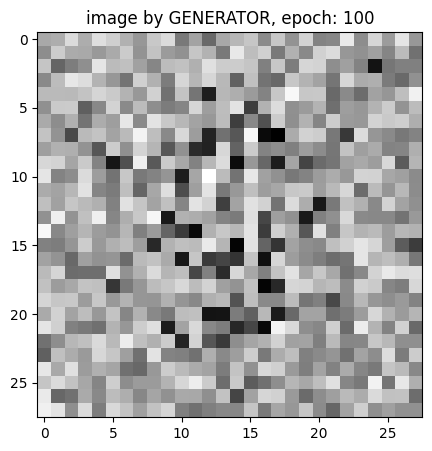

EPOCH 120: BATCH: 467, discrim_loss: 3.0712514779637767e-13, generator_loss: 3.4068724946191564e-13


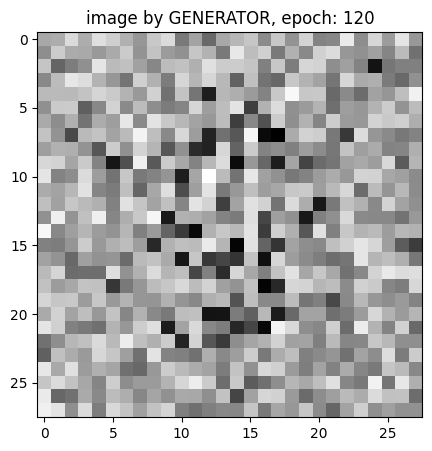

EPOCH 140: BATCH: 467, discrim_loss: 5.414765857914006e-13, generator_loss: 4.4751607476169186e-13


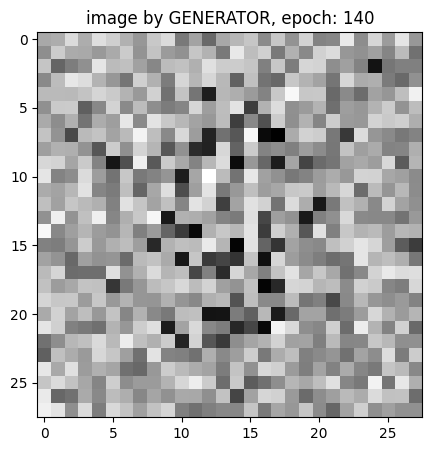

EPOCH 160: BATCH: 467, discrim_loss: 2.5369861918721204e-13, generator_loss: 5.833030456217636e-13


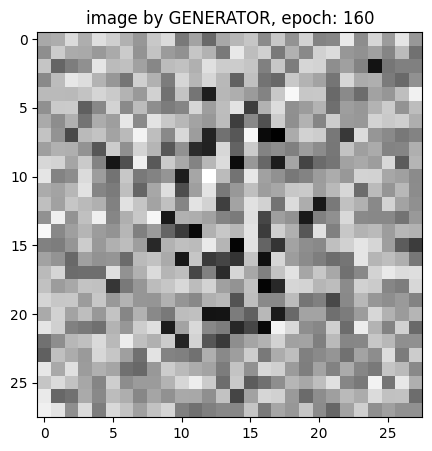

EPOCH 180: BATCH: 467, discrim_loss: 1.56002963910655e-13, generator_loss: 2.594647044960874e-13


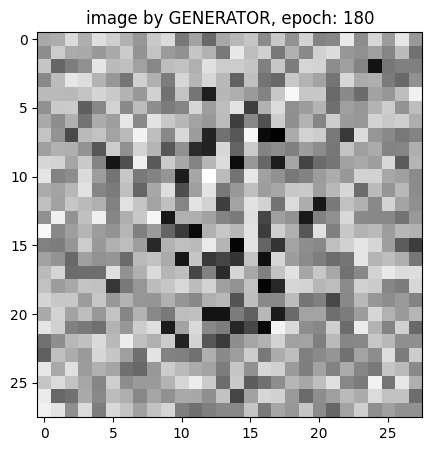

EPOCH 200: BATCH: 467, discrim_loss: 7.356847336187355e-13, generator_loss: 5.869021631535465e-13


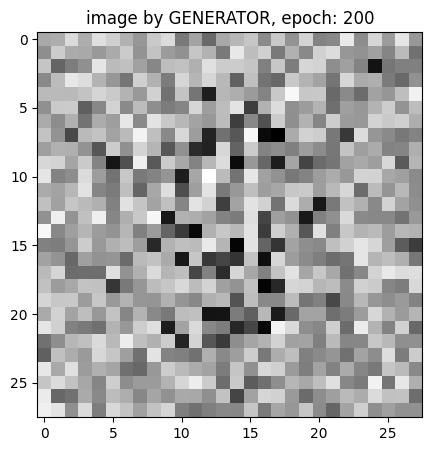

EPOCH 220: BATCH: 467, discrim_loss: 9.546286965133113e-14, generator_loss: 5.906449374731837e-13


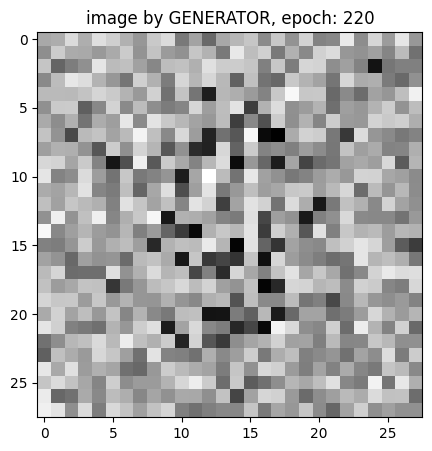

EPOCH 240: BATCH: 467, discrim_loss: 4.741401498850606e-13, generator_loss: 2.963333585134266e-14


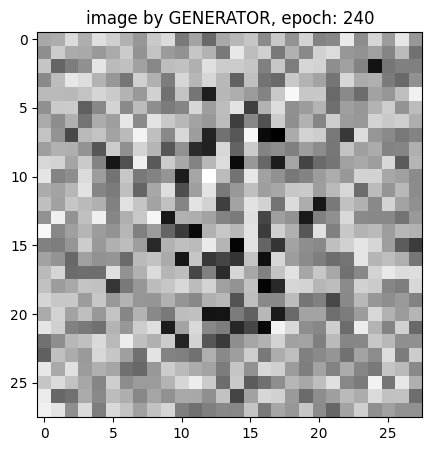

EPOCH 260: BATCH: 467, discrim_loss: 8.957916873553184e-14, generator_loss: 4.3736451363785706e-14


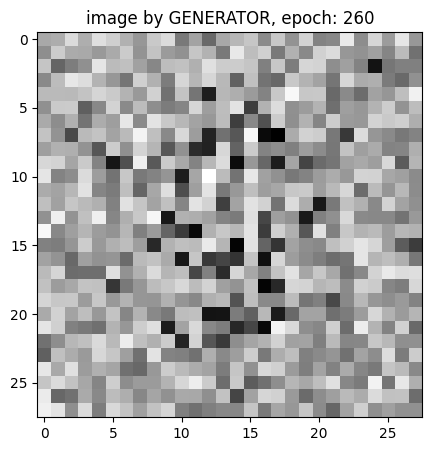

EPOCH 280: BATCH: 467, discrim_loss: 1.9234649138201443e-13, generator_loss: 4.335660790891899e-14


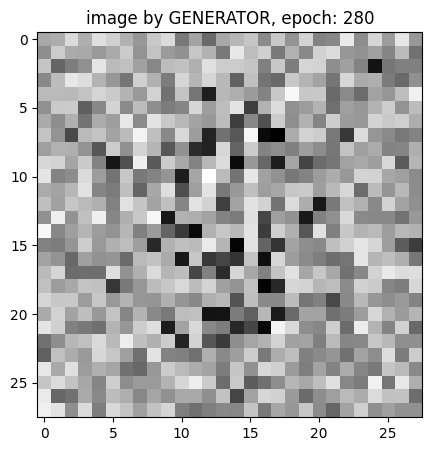

(Discriminator(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=1, bias=True)
 ),
 Generator(
   (fc1): Linear(in_features=100, out_features=128, bias=True)
   (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc2): Linear(in_features=128, out_features=256, bias=True)
   (fc2_bn): BatchNorm1d(256, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc3): Linear(in_features=256, out_features=512, bias=True)
   (fc3_bn): BatchNorm1d(512, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc4): Linear(in_features=512, out_features=1024, bias=True)
   (fc4_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc5): Linear(in_features=1024, out_features=784, bias=True)
 ))

In [89]:
# def train_model(latent_dims, discriminator, generator, batch_size,k_steps,
#                optim_d, optim_g, criterion, dataloader, epochs, device=None):
train_model(z_dim,discriminator,generator,batch_size,1,
           optim_d,optim_g,criterion,dataloader,epochs,None)